# Exploring OLS models before pipelining

 Wrap preprocessing + estimator in an sklearn Pipeline and dump with joblib.

 Store model files under models/ but track them with DVC or MLflow.

 Use Papermill or nbconvert to transform exploratory notebooks into parameterised, non-interactive steps.

 Orchestrate regular re-training with Prefect or similar.

 Preserve Python environment specs next to the artefact.

**TODO**: Maybe docker implementation for automated workflow

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path     
import models 
import mlflow
import os
import subprocess
import time


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def kill_process_on_port(port):
    try:
        result = subprocess.check_output(f"lsof -ti tcp:{port}", shell=True, text=True)
        pids = result.strip().split('\n')
        for pid in pids:
            if pid:
                print(f"Killing process {pid} on port {port}")
                os.system(f"kill -9 {pid}")
    except subprocess.CalledProcessError:
        print(f"No process found on port {port}")

def start_mlflow_ui(port=5000):
    kill_process_on_port(port)
    print(f"Starting MLflow UI on port {port} ...")
    subprocess.Popen(
        ["mlflow", "ui", "--host", "127.0.0.1", "--port", str(port)],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL
    )
    time.sleep(3)
    print(f"MLflow UI running at http://127.0.0.1:{port}")

start_mlflow_ui()

Killing process 88619 on port 5000
Starting MLflow UI on port 5000 ...
MLflow UI running at http://127.0.0.1:5000


In [4]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")


file_path = Path("/home/user/data/sector_10.parquet")

file_path.name  # → "sector_10.parquet"

file_path.stem  # → "sector_10"

.glob: indicates patterns to be found within the dir

In [5]:
data_dir = Path.cwd().parent/'data'

df_dict = {
    file.stem.replace("sector_","") : pd.read_parquet(file)
    for file in data_dir.glob("sector_*.parquet")
}

In [12]:
df_dict['10']

,vol,ret,shrout,prc,askhi,bidlo,put_volume,call_volume,put_call_ratio,vix_close,...,enhanced_baker,news_sent,mktcap,turn_sd,sect_mktcap,mvel1,dolvol,daily_illq,excess_ret,excess_mkt_ret
index,,,,,,,,,,,,,,,,,,,,,
1998-01-02,1.420280e+06,0.003287,1.013942e+06,62.745296,63.068083,61.909911,517.261250,334.857022,1.847545,23.420000,...,2.396,0.27,6.448867e+07,3.072879,6.362010e+07,17.982000,8.911586e+07,0.000037,0.003077,0.00199
1998-01-05,2.406067e+06,-0.021214,1.019566e+06,61.345891,62.921670,60.701696,530.978253,660.178316,1.212341,24.360001,...,2.396,0.25,6.375211e+07,3.072879,6.254618e+07,17.970513,1.476023e+08,0.000144,-0.021424,0.00199
1998-01-06,3.054767e+06,-0.034761,1.018568e+06,59.217327,60.627729,58.551701,1616.712030,1889.734468,1.173952,25.660000,...,2.396,0.25,6.141981e+07,3.072879,6.031685e+07,17.933243,1.808951e+08,0.000192,-0.034971,-0.01061
1998-01-07,3.424121e+06,0.024678,1.023829e+06,60.827941,61.007635,58.900709,698.726996,1089.622229,0.860878,25.070000,...,2.396,0.26,6.361143e+07,3.072879,6.227738e+07,17.968304,2.082822e+08,0.000118,0.024468,-0.00401
1998-01-08,2.111215e+06,-0.026138,1.026307e+06,59.194500,60.581523,58.992218,803.304360,1392.336539,0.953283,26.010000,...,2.396,0.22,6.219968e+07,3.072879,6.075174e+07,17.945860,1.249723e+08,0.000209,-0.026348,-0.00841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,2.347036e+07,-0.010369,1.883786e+06,66.738612,68.679728,66.089400,11076.968965,11395.992407,1.101672,30.110001,...,2.409,-0.04,1.307736e+08,3.072879,1.257212e+08,18.688979,1.566379e+09,0.000007,-0.010479,-0.02181
2018-12-24,7.596090e+06,-0.040239,1.888364e+06,64.208265,66.537325,64.152997,8901.756413,12131.554525,0.944079,36.070000,...,2.409,-0.04,1.263795e+08,3.072879,1.212486e+08,18.654799,4.877318e+08,0.000083,-0.040349,-0.02561
2018-12-26,1.292724e+07,0.062713,1.874340e+06,68.235958,68.260304,63.652624,8887.402809,17054.673252,0.715864,30.410000,...,2.409,-0.08,1.324008e+08,3.072879,1.278974e+08,18.701344,8.821027e+08,0.000071,0.062603,0.05049


# OLS baseline: c4f+ff5

In [ ]:
df_dict['10'].columns

: 

: 

3FF

In [6]:
features_c4f = ['excess_mkt_ret','smb', 'hml','umd']

Testing the number of lags chosen

In [ ]:
# import statsmodels.api as sm
# from statsmodels.tsa.stattools import acf
# olstest_x = df_dict['10'][features_ff5_enhanced]
# olstest_y= df_dict['10']['excess_ret']
# olstest_model = sm.OLS(olstest_y,olstest_x).fit()

# rho, confint = acf(olstest_model.resid, nlags=50, alpha=0.05)

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(confint[:,0], label='lower confint')
# plt.plot(confint[:,1], '--', label='upper confint')

3 should be good number of lags

In [ ]:
for sector, df in df_dict.items():
    model = models.olsmodel(
        y='excess_ret',
        features=features_c4f,
        lags=3,
        run_name=f'{sector}_baseline',
        fama_french_ver='c4f',
        experiment_name='baseline_ols'
    )
    model.fit(df)


Creating runs in the same experiment with famafrench 5

In [ ]:
features_ff5 = ['excess_mkt_ret','smb', 'hml','umd','cma']

In [ ]:
for sector, df in df_dict.items():
    model = models.olsmodel(
        y='excess_ret',
        features=features_ff5,
        lags=3,
        run_name=f'{sector}_baseline',
        fama_french_ver='ff5',
        experiment_name='baseline_ols'
    )
    model.fit(df)
  


## OLS Enhanced c4f+ff5

In [ ]:
df_dict['10'].columns

In [ ]:
features_c4f_enhanced = ['excess_mkt_ret','smb', 'hml','umd','turn','turn_sd','mvel1','dolvol','daily_illq','zero_trade_ratio','baspread','enhanced_baker','vix_close','put_call_ratio','news_sent']

In [ ]:
for sector, df in df_dict.items():
    model = models.olsmodel(
        y='excess_ret',
        features=features_c4f_enhanced,
        lags=3,
        run_name=f'{sector}_enhanced',
        fama_french_ver='c4f_enhanced',
        experiment_name='enhanced_ols'
    )
    model.fit(df)
  


In [ ]:
for sect, df in df_dict.items():
    corr = df[features_c4f_enhanced].corr()

In [ ]:
df_dict['10'].corr()

Zero_trade_ratio is almost all zeroes, making its VIF NaN. Turn_sd is dervied from turn, making it perfcet multicollin

In [ ]:
df_dict['10']['zero_trade_ratio'].nunique()
df_dict['10']['zero_trade_ratio'].describe()

FF5 enhanced


In [ ]:
features_ff5_enhanced = ['excess_mkt_ret','smb', 'hml','umd','cma','turn','turn_sd','mvel1','dolvol','daily_illq','zero_trade_ratio','baspread','enhanced_baker','vix_close','put_call_ratio','news_sent']

In [ ]:
for sector, df in df_dict.items():
    model = models.olsmodel(
        y='excess_ret',
        features=features_ff5_enhanced,
        lags=3, 
        run_name=f'{sector}_enhanced',
        fama_french_ver='ff5_enhanced',
        experiment_name='enhanced_ols'
    )
    model.fit(df)
  


# Random Forest playground

In [6]:
from sklearn.ensemble import RandomForestRegressor
  

In [ ]:
rf = RandomForestRegressor().fit(
    X=df_dict['10'][features_c4f],
    y=df_dict['10']['excess_ret']
)

In [ ]:
rf.feature_importances_

In [ ]:
import shap

In [ ]:
shap_explain = shap.TreeExplainer(rf)
shap_vals = shap_explain(df_dict['10'][features_c4f])

In [ ]:
shap.summary_plot(shap_vals,df_dict['10'][features_c4f],show=False)

In [15]:
df_dict['10'].isna().sum()

vol                 0
ret                 0
shrout              0
prc                 0
askhi               0
bidlo               0
put_volume          0
call_volume         0
put_call_ratio      0
vix_close           0
turn                0
zero_trade_ratio    0
baspread            0
mktrf               0
smb                 0
hml                 0
rmw                 0
umd                 0
cma                 0
rf                  0
enhanced_baker      0
news_sent           0
mktcap              0
turn_sd             0
sect_mktcap         0
mvel1               0
dolvol              0
daily_illq          0
excess_ret          0
excess_mkt_ret      0
dtype: int64

Experiment 970021161063642275 created


Successfully registered model 'rf_c4f_test_test rf'.
2025/05/21 11:05:18 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: rf_c4f_test_test rf, version 1
Created version '1' of model 'rf_c4f_test_test rf'.
Successfully registered model 'surr_c4f_test_test rf'.
2025/05/21 11:05:20 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: surr_c4f_test_test rf, version 1
Created version '1' of model 'surr_c4f_test_test rf'.


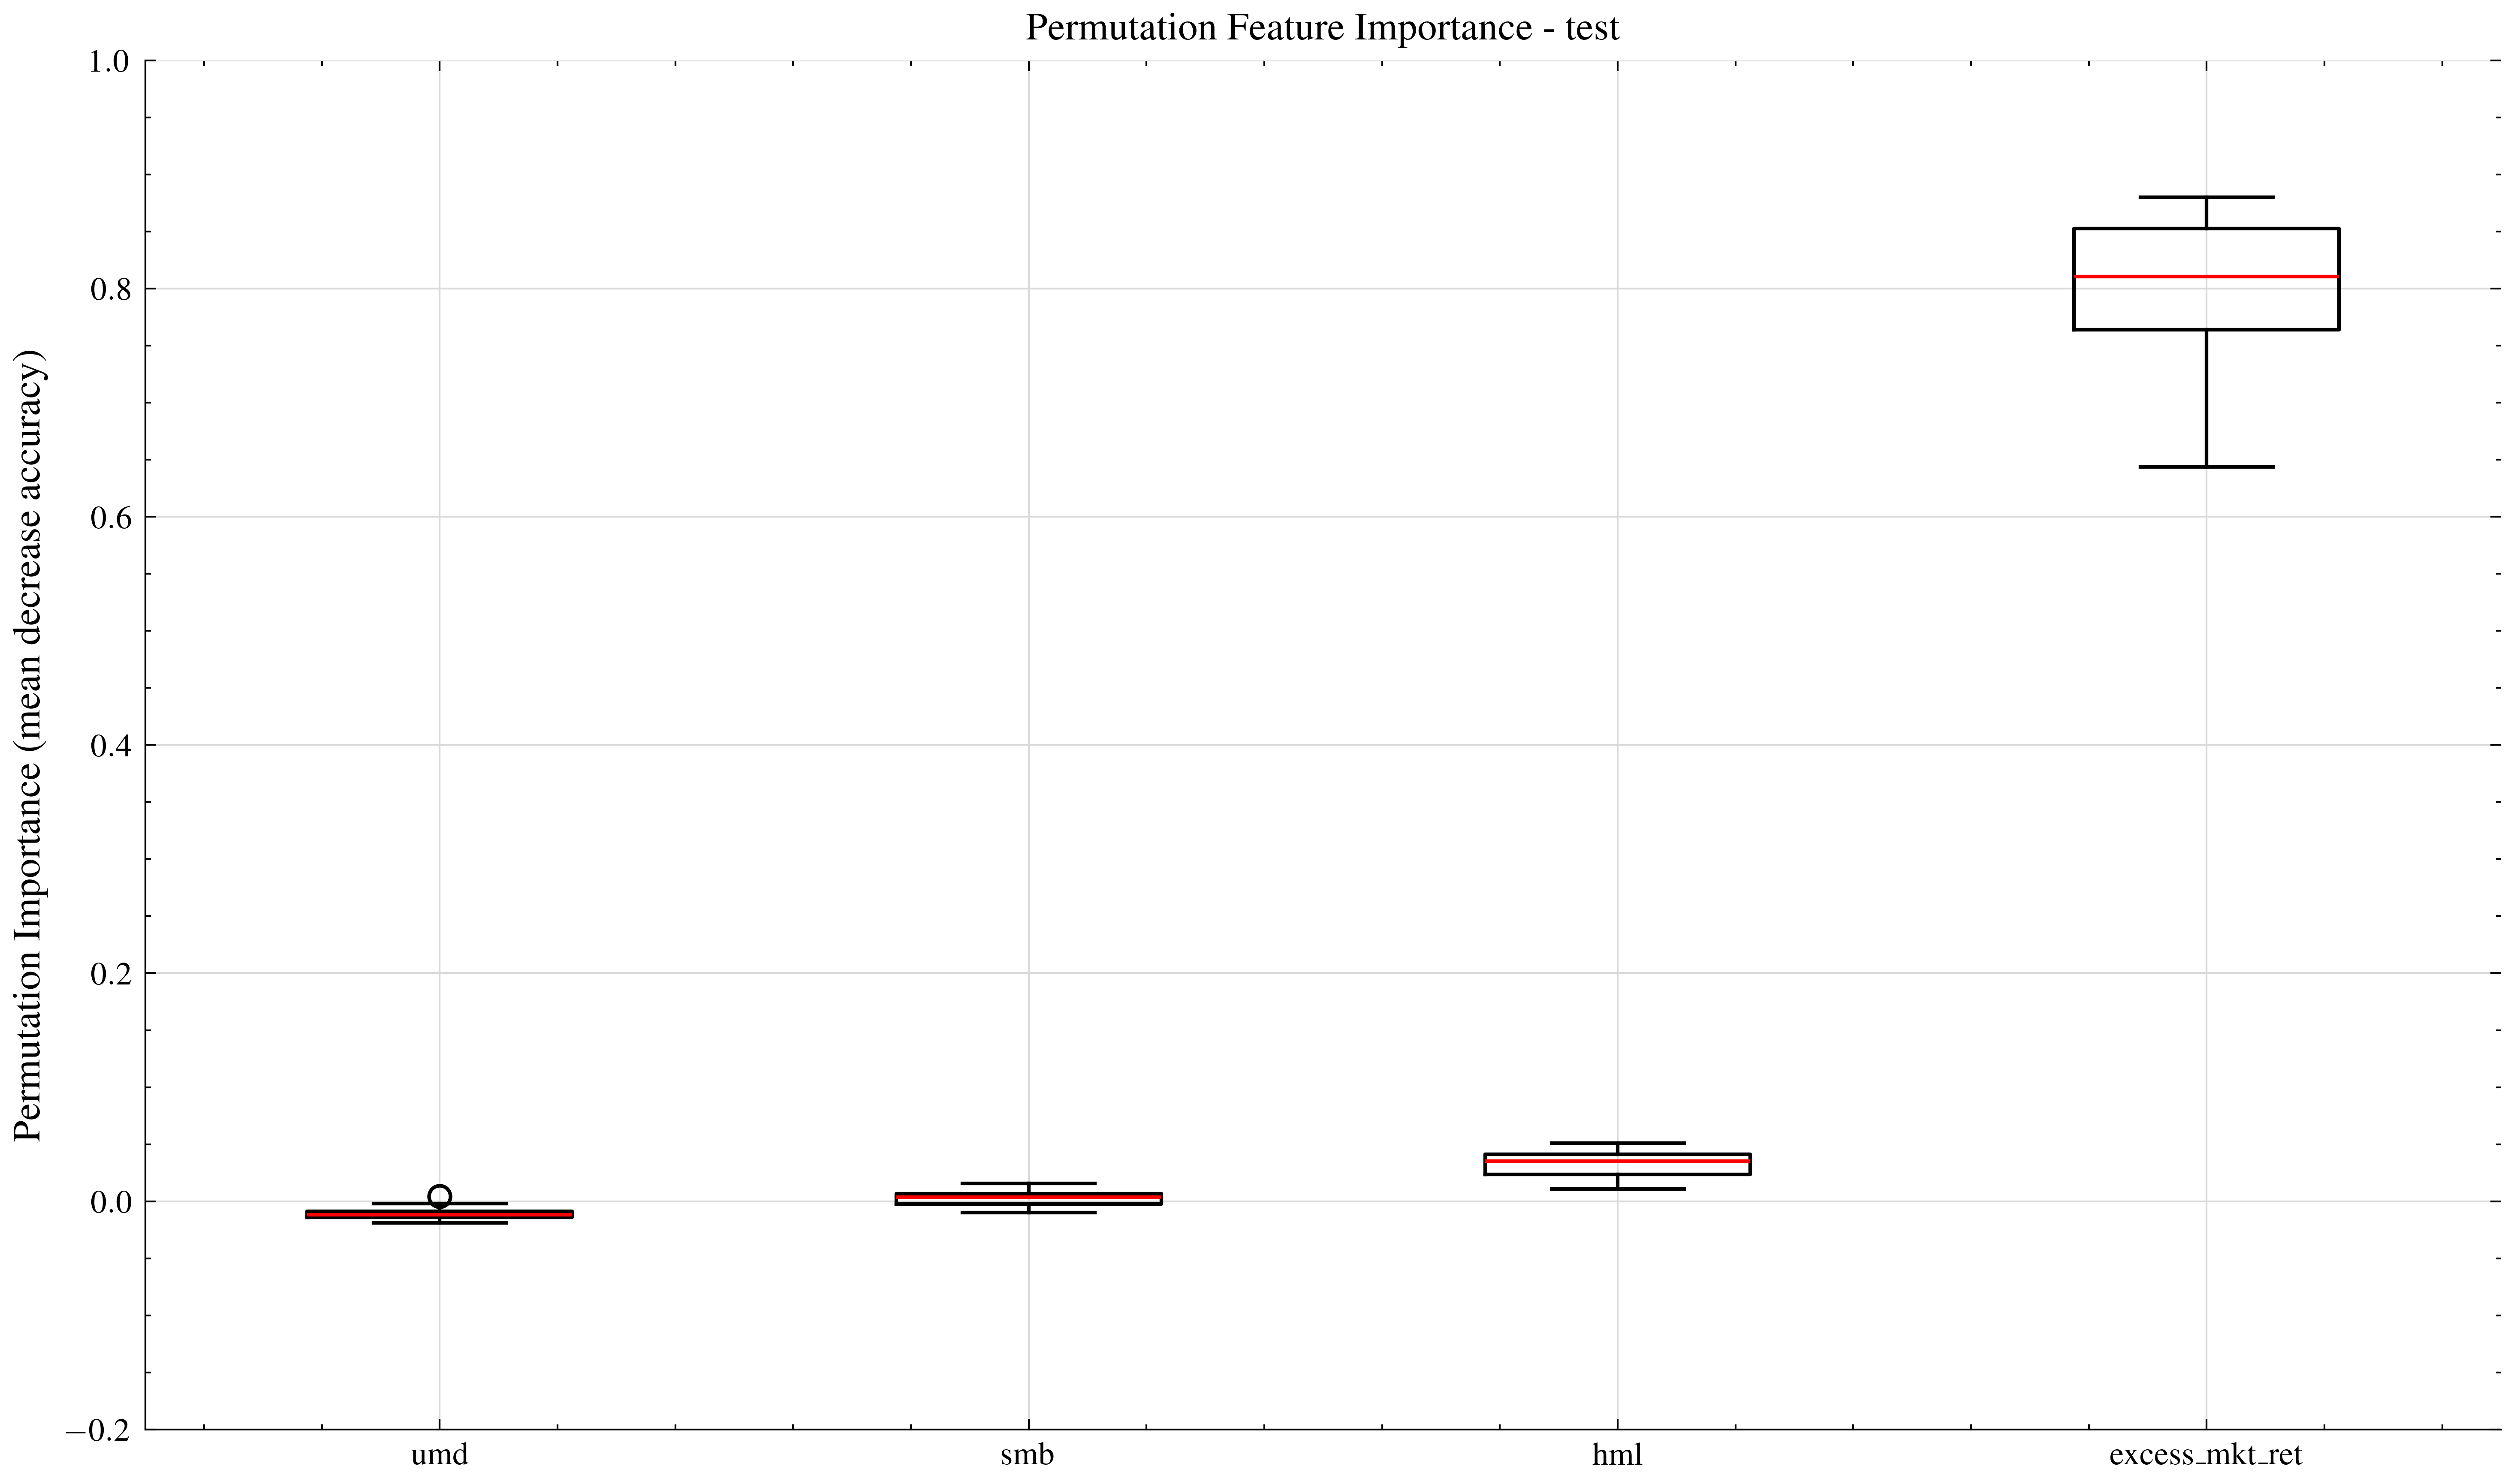

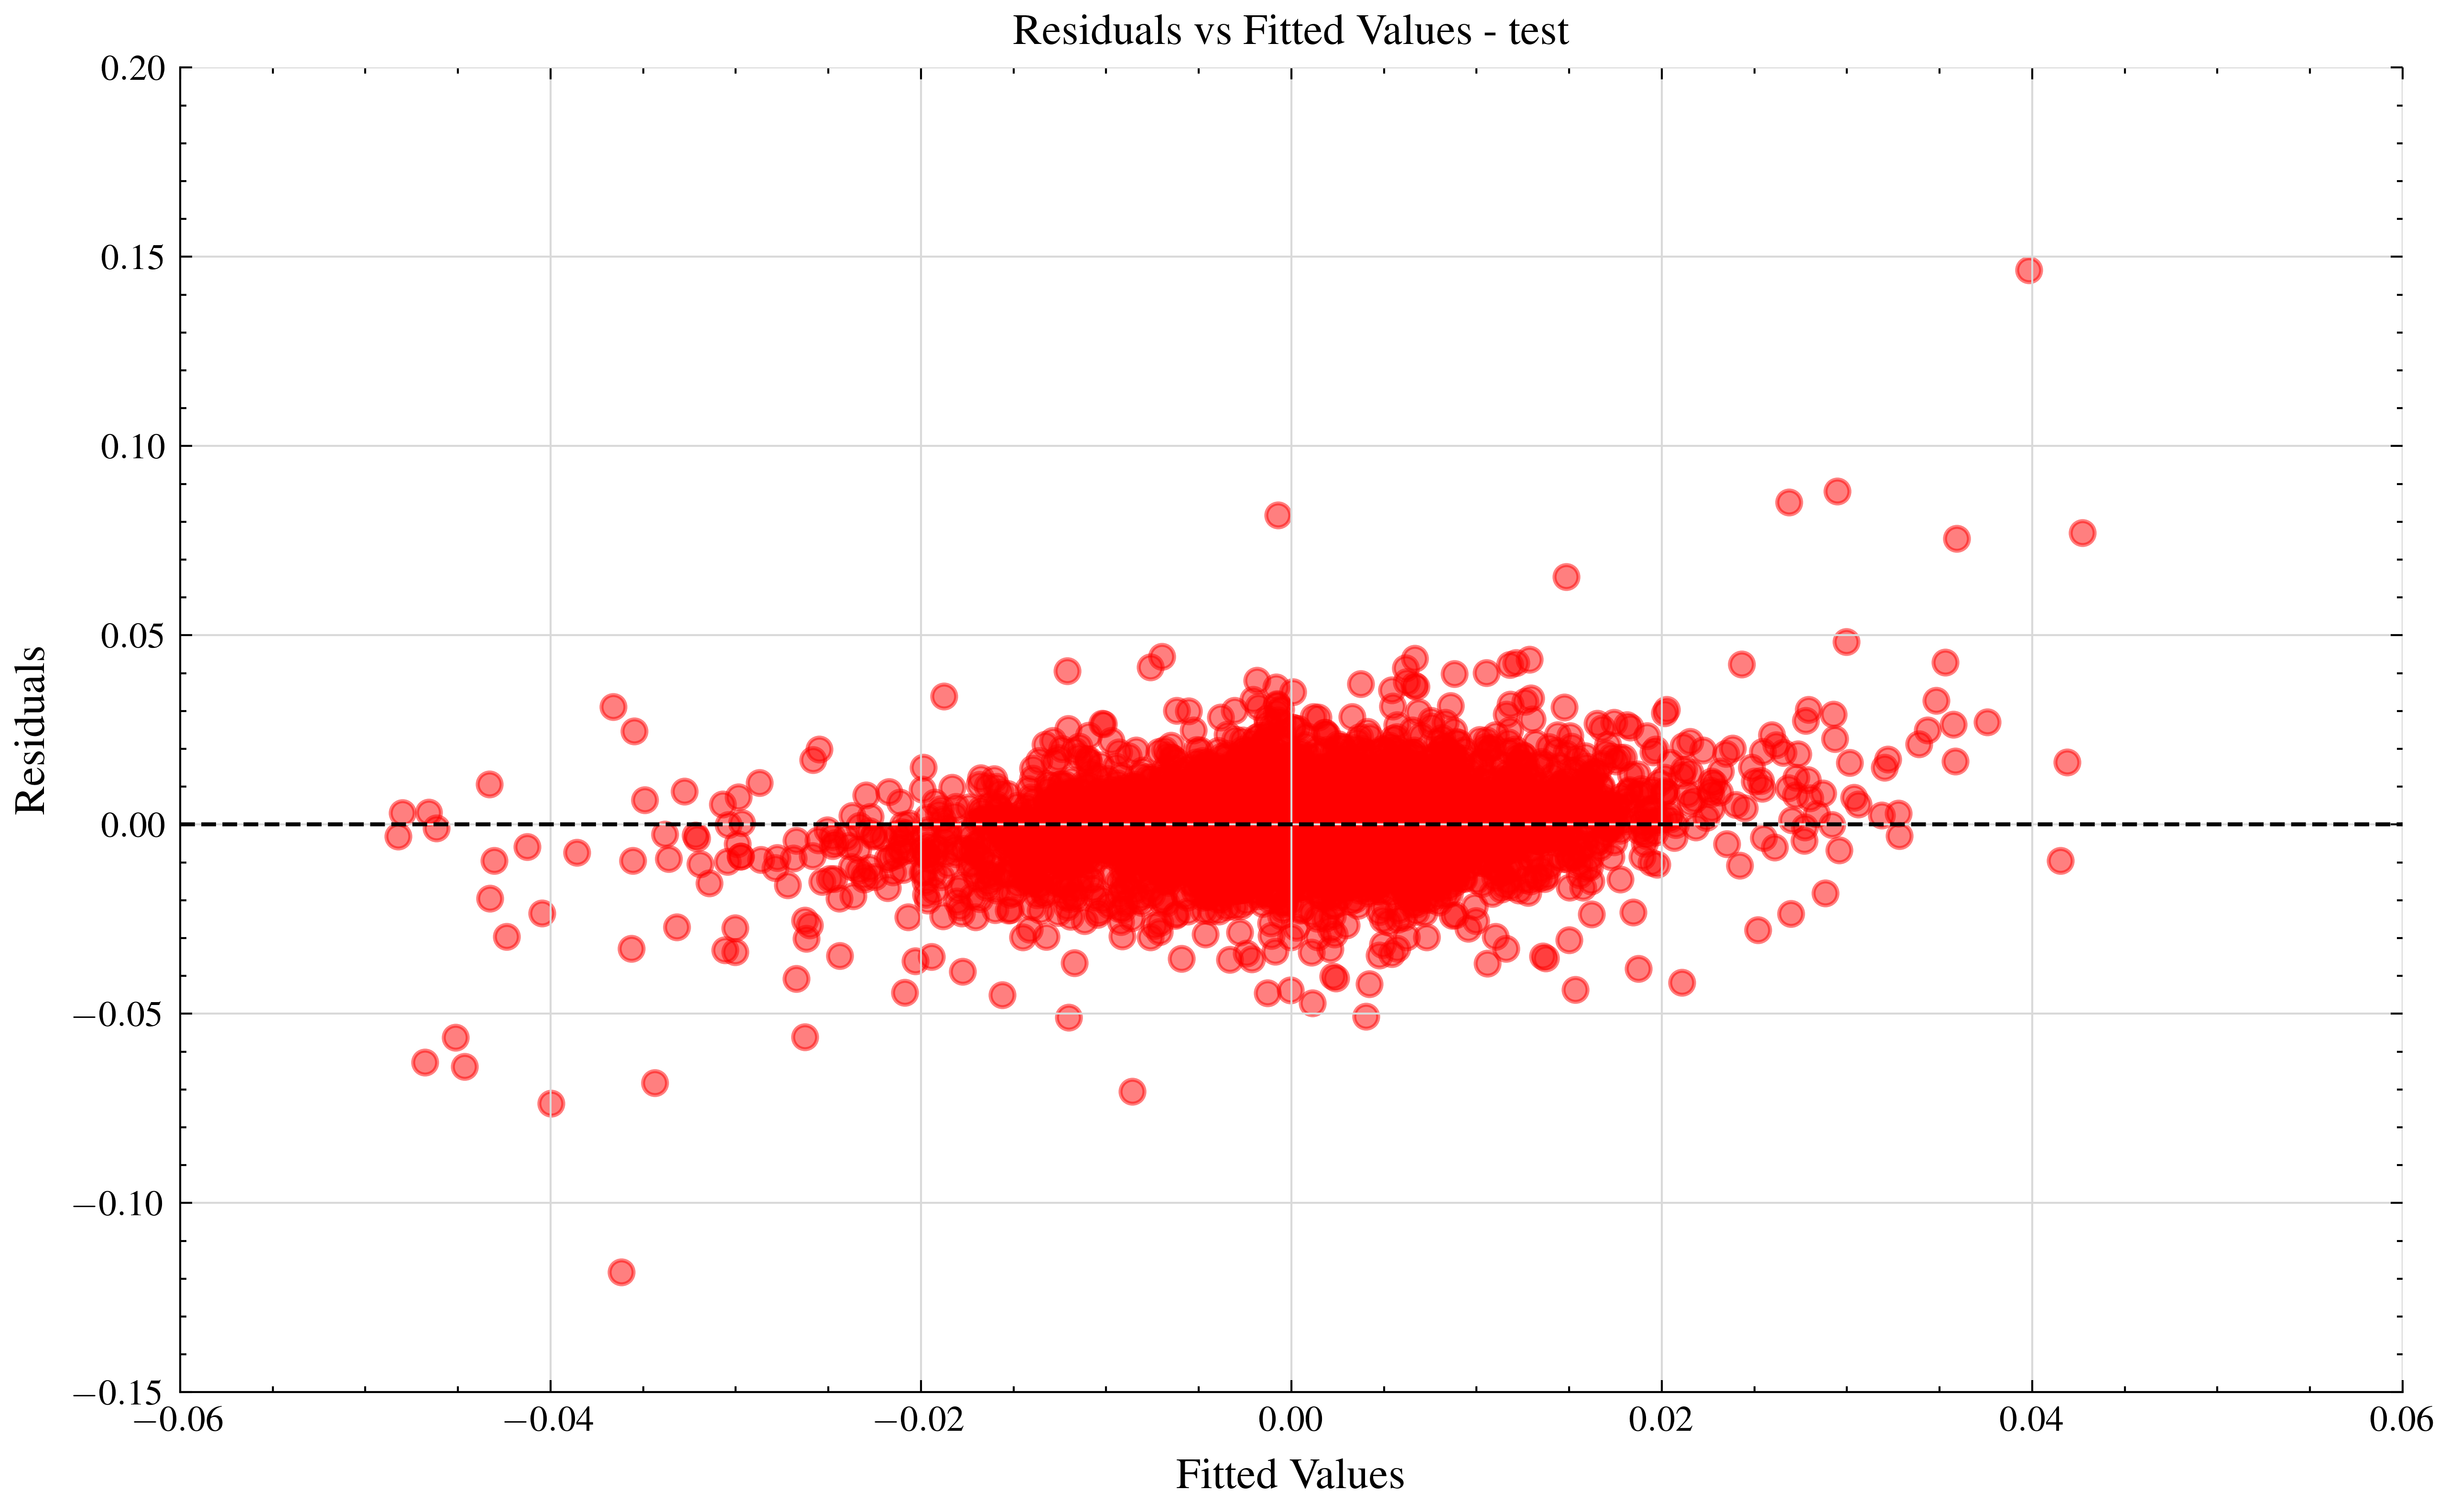

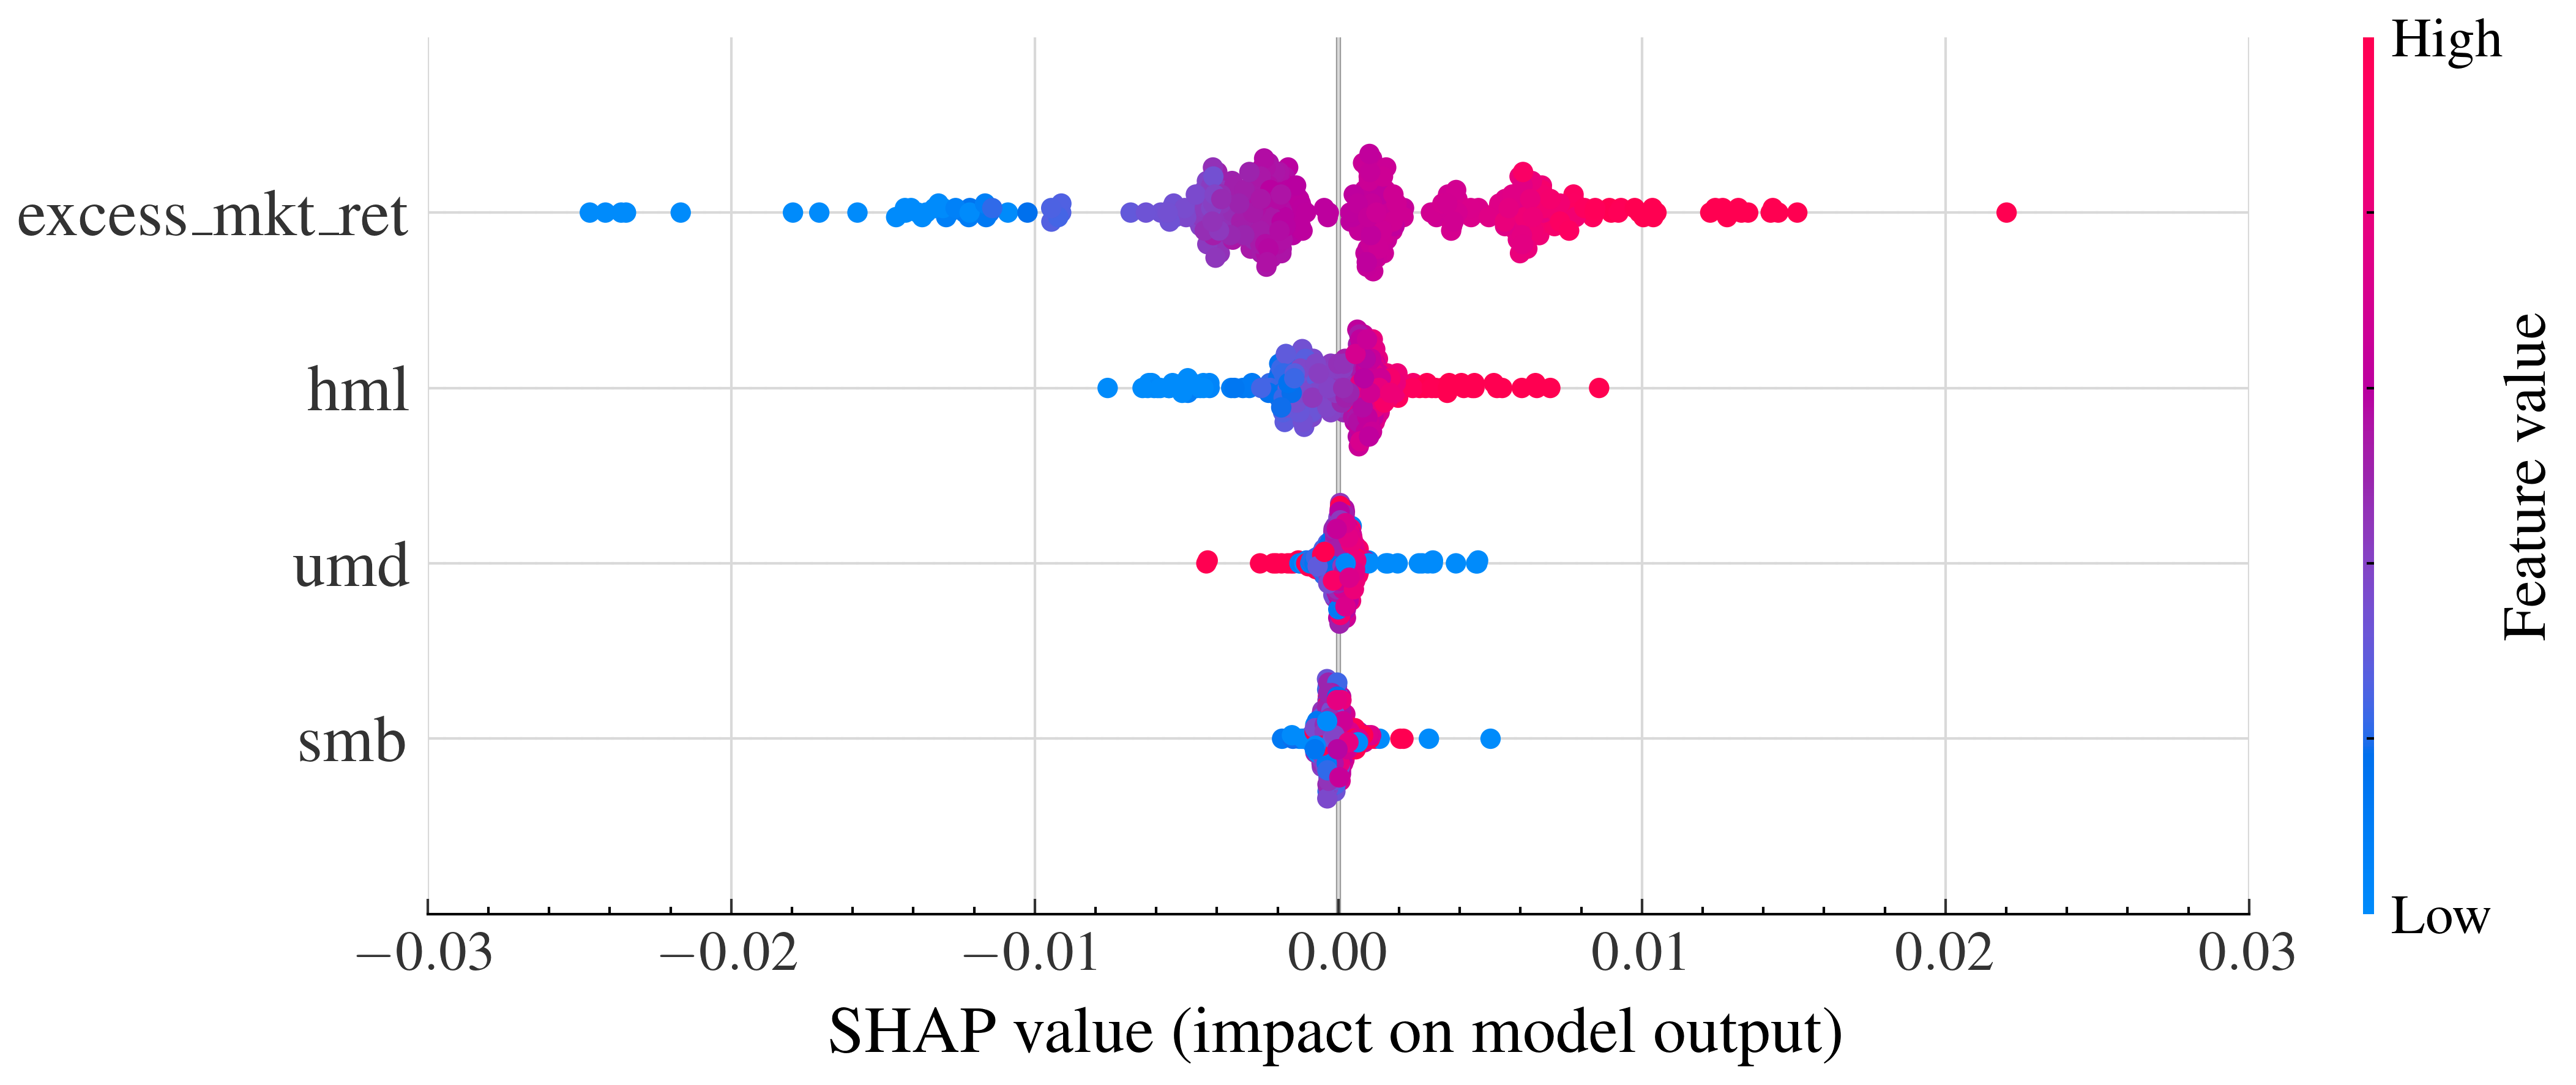

🏃 View run test at: http://127.0.0.1:5000/#/experiments/970021161063642275/runs/61e2e623e02b437e9eb23d802e776eae
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/970021161063642275


In [16]:
models.randomforest(
    y='excess_ret',
    features=features_c4f,
    lags=3, 
    run_name='test',
    fama_french_ver='c4f',
    experiment_name='test rf'
    ).fit(df_dict['10'])

In [12]:
from mlflow import MlflowClient